Multi agent DQN

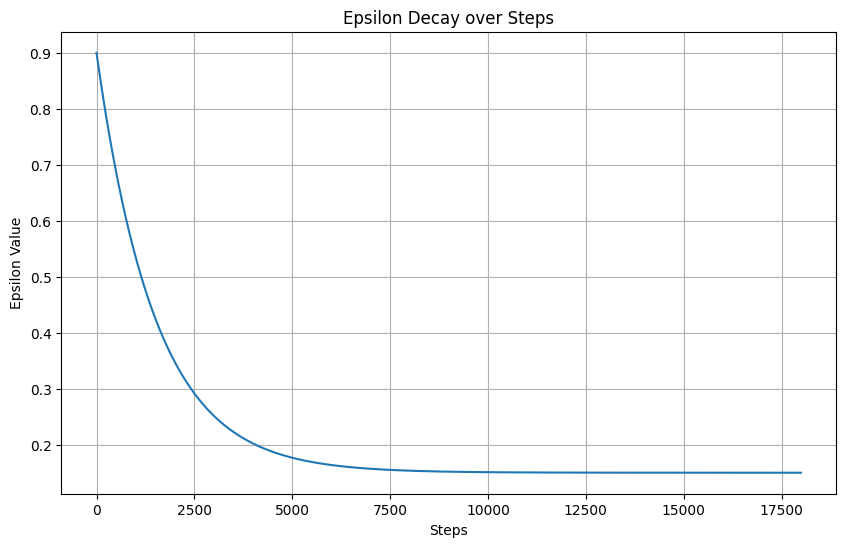

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def epsilon_decay(step, EPS_START=1.0, EPS_END=0.01, EPS_DECAY=200):
    return EPS_END + (EPS_START - EPS_END) * np.exp(-1. * step / EPS_DECAY)

episodes = 300
time_steps = 60
eps_start, eps_end, eps_decay = 0.9, 0.15, 1500

steps = np.arange(episodes * time_steps)
eps_values = epsilon_decay(steps, eps_start, eps_end, eps_decay)

plt.figure(figsize=(10, 6))
plt.plot(steps, eps_values)
plt.title('Epsilon Decay over Steps')
plt.xlabel('Steps')
plt.ylabel('Epsilon Value')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sub_folder = 'variational_loading/variational_resources/'
# sub_folder = ''
# model_folder = f'{sub_folder}mdqn1000ep500m25inc1000mcmax40rps500interval0.75alpha_double_dueling_varres'
# model_folder = f'{sub_folder}mdqn600ep500m25inc1000mcmax50rps500interval0.75alpha_double_dueling'
# model_folder = f'../code/model_metric_data/mdqn600ep500m50inc1000mcmax140rps0.5alpha_double'
# model_folder = f'../code/model_metric_data/mdqn600ep500m25inc500mcmax140rps0.5alpha_double_dueling'
# model_folder = f'../code/model_metric_data/mdqn300ep500m25inc500mcmax90rps0.75alpha_double_dueling'

sub_folder = '../code/model_metric_data/dqn/'
# sub_folder = '../trained/dqn/'
# model_folder = f'{sub_folder}/mdqn310ep1000m25inc2_rf_20rps5.0alpha1000res_double_dueling_independent_state'
model_folder = f'{sub_folder}/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_double_dueling'


ep_summed_rewards_df = pd.read_csv(f'{model_folder}/ep_summed_rewards.csv')
ep_latencies_df = pd.read_csv(f'{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'{model_folder}/resource_dev.csv')

num_agents = 3
agent_ep_summed_rewards = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_ep_summed_rewards.append(agent_rewards_df)


# model_folder = 'mdqn300ep500m50inc1000mcmax90rps0.75alpha'
# ep_summed_rewards_df = pd.read_csv(f'../trained/{model_folder}/ep_summed_rewards.csv')
# ep_latencies_df = pd.read_csv(f'../trained/{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'../trained/{model_folder}/resource_dev.csv')

# num_agents = 3
# agent_ep_summed_rewards = []
# for agent_idx in range(num_agents):
#     filename = f'../trained/{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
#     agent_rewards_df = pd.read_csv(filename)
#     agent_ep_summed_rewards.append(agent_rewards_df)

In [2]:
agents_mean_latenices = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_mean_latencies.csv'
    agent_latencies_df = pd.read_csv(filename)
    agents_mean_latenices.append(agent_latencies_df)

In [3]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

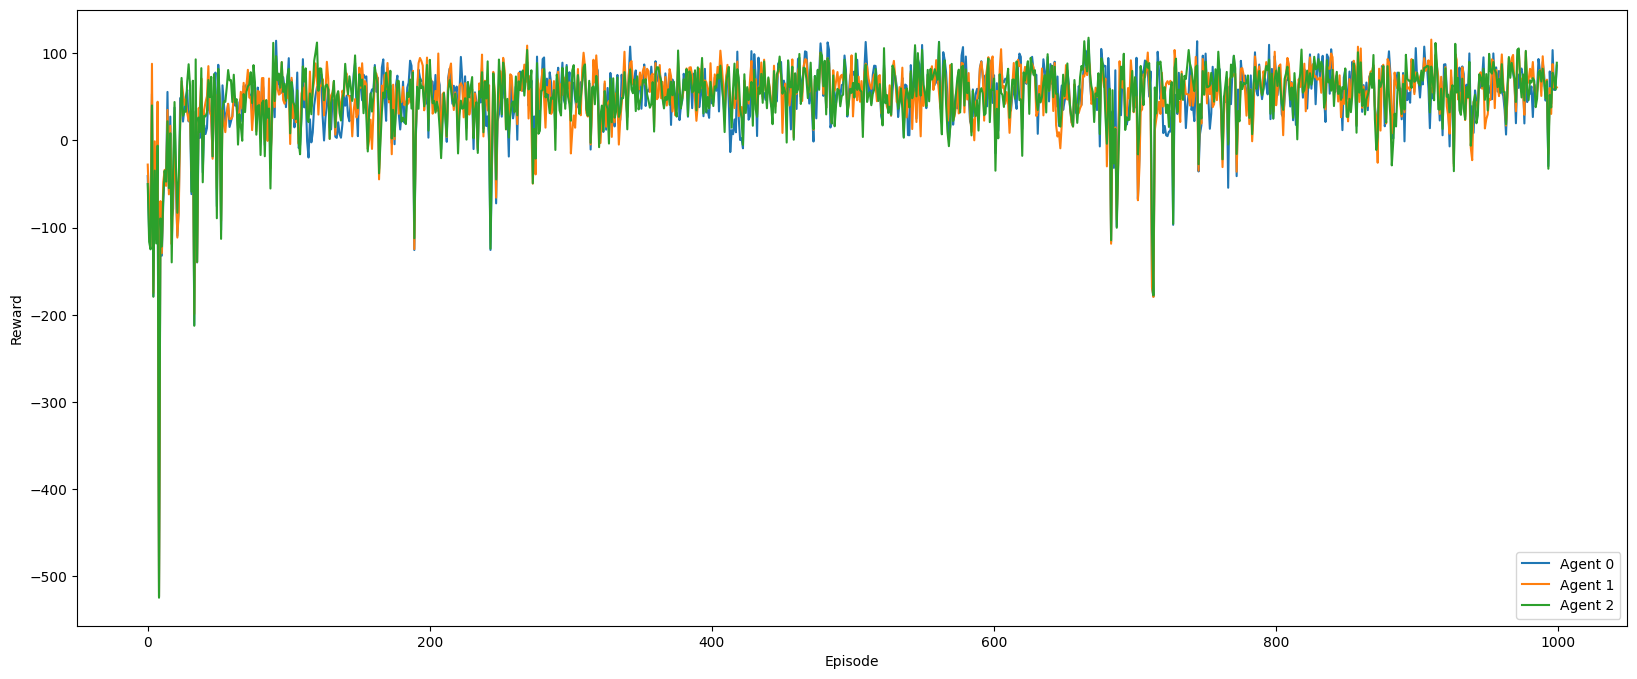

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_ep_summed_rewards)):
    ax.plot(agent_ep_summed_rewards[i]['Episode'], agent_ep_summed_rewards[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


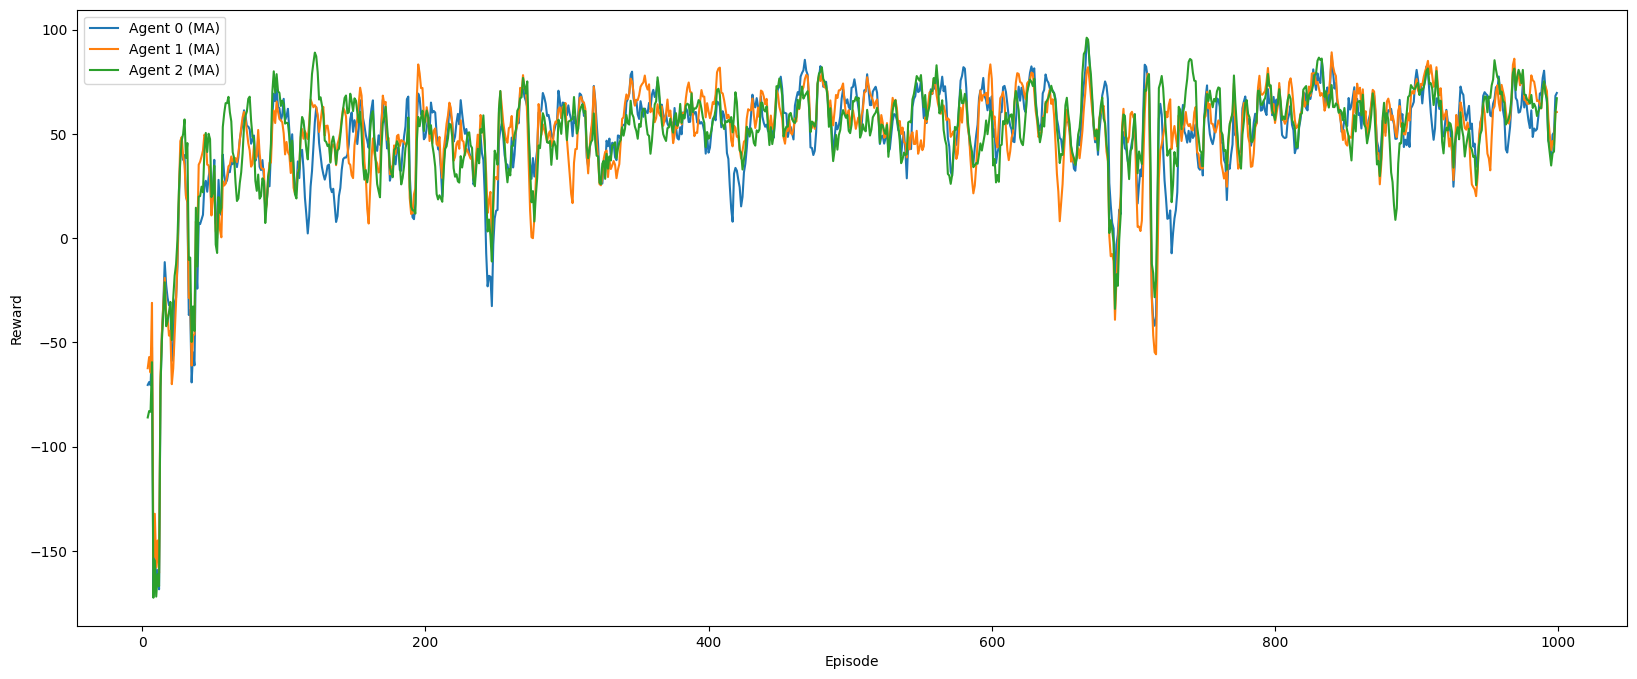

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 5

for i in range(len(agent_ep_summed_rewards)):
    rewards_smoothed = moving_average(agent_ep_summed_rewards[i]['Reward'], window_size)
    episodes_adjusted = agent_ep_summed_rewards[i]['Episode'][window_size-1:]
    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')

ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

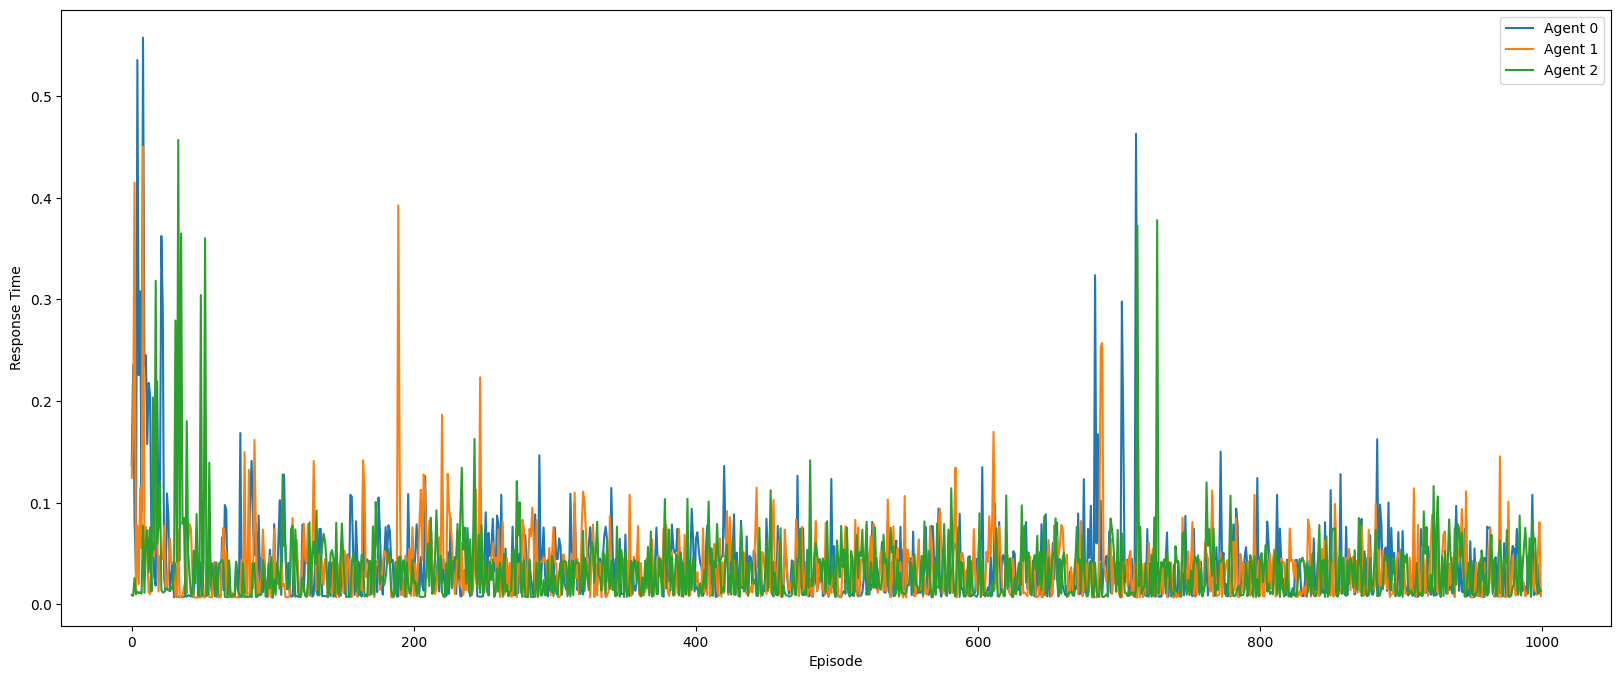

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agents_mean_latenices)):
    ax.plot(agents_mean_latenices[i]['Episode'], agents_mean_latenices[i]['Latency'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Response Time')
ax.legend()
plt.show()


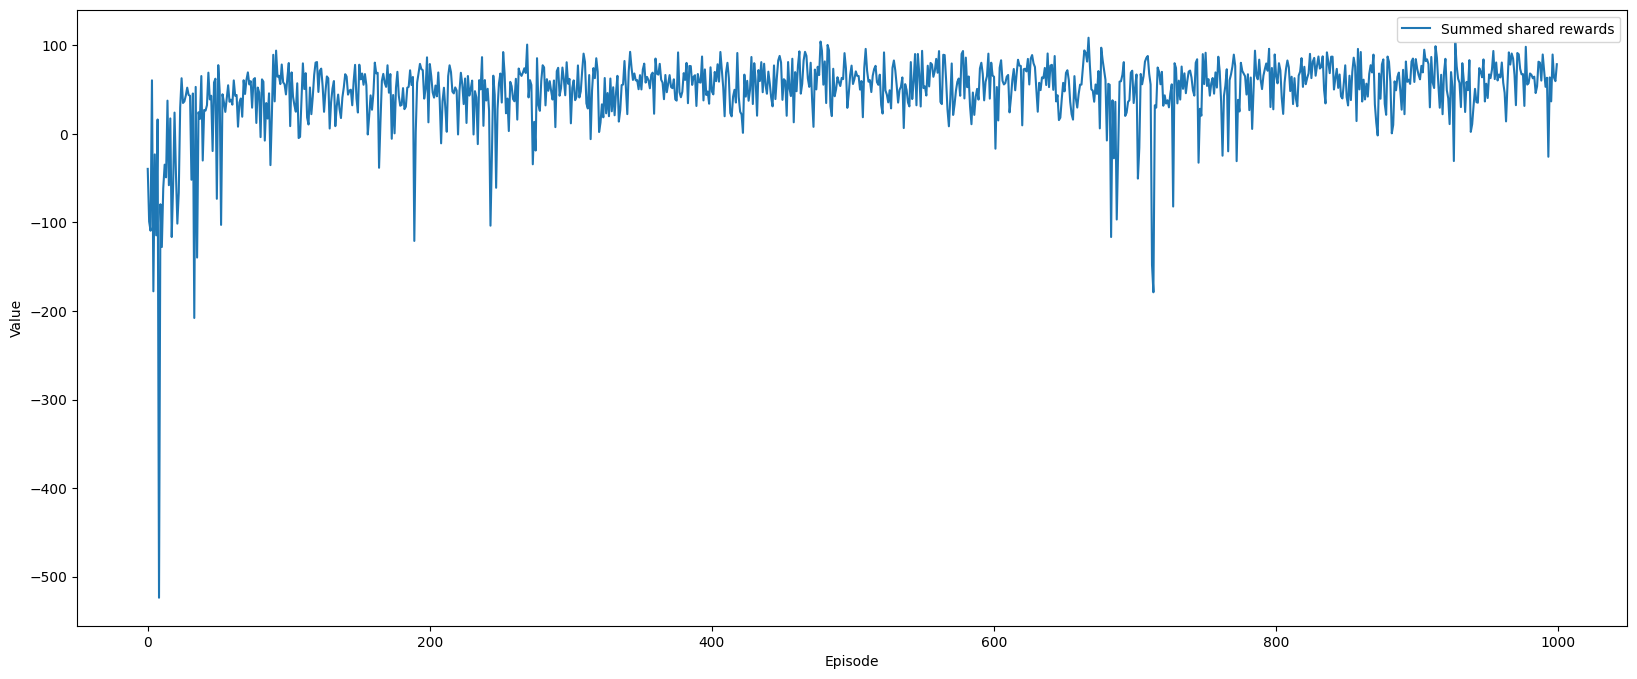

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_summed_rewards_df['Reward'], label='Summed shared rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()


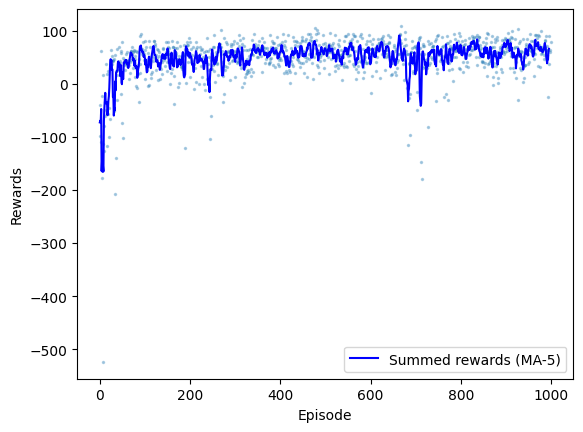

In [8]:
mw = 5
avg_results = moving_average(ep_summed_rewards_df['Reward'], mw)
plt.plot(ep_summed_rewards_df['Reward'], marker=".", linestyle="", markersize=3, alpha=0.3)
plt.plot(avg_results, color="blue", label=f"Summed rewards (MA-{mw})")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.show()

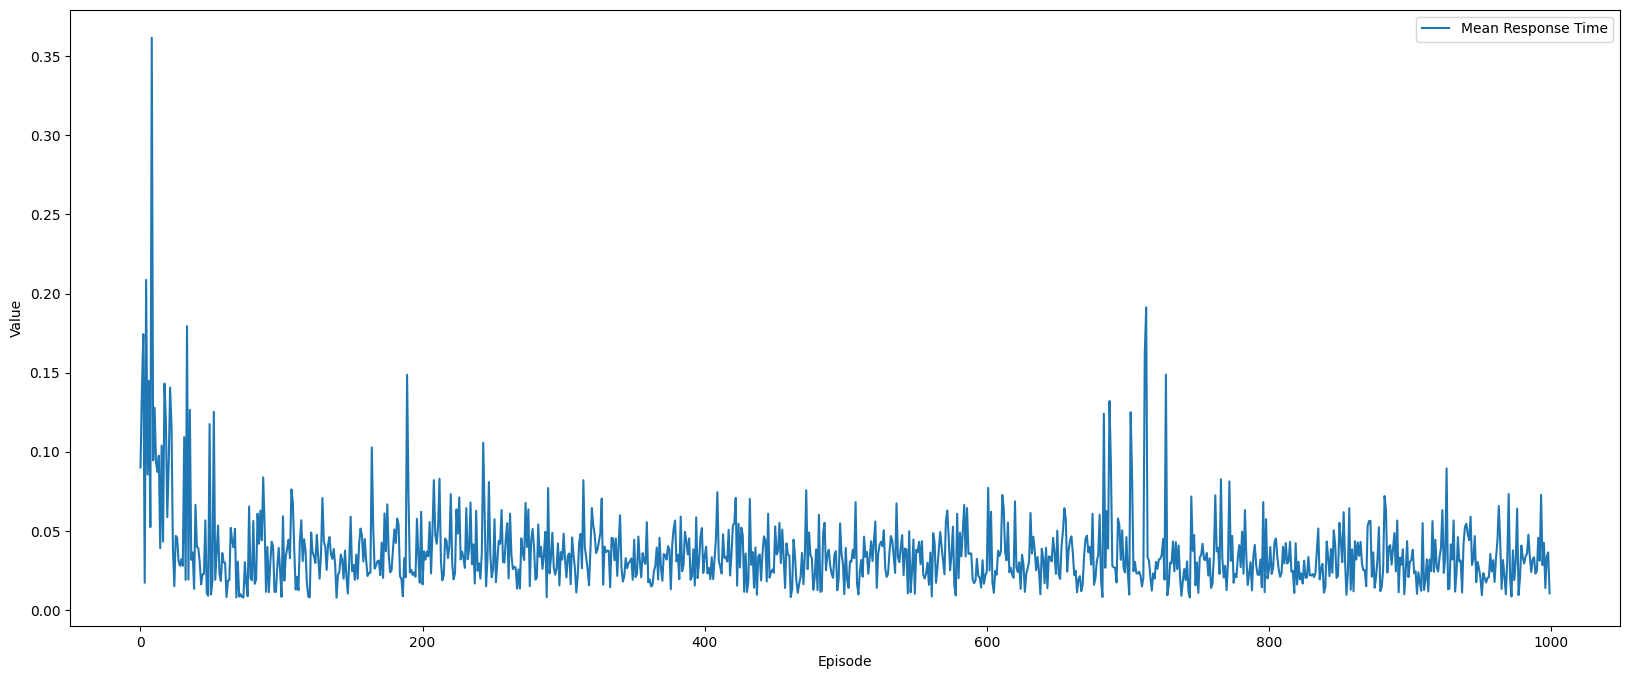

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Response Time')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()

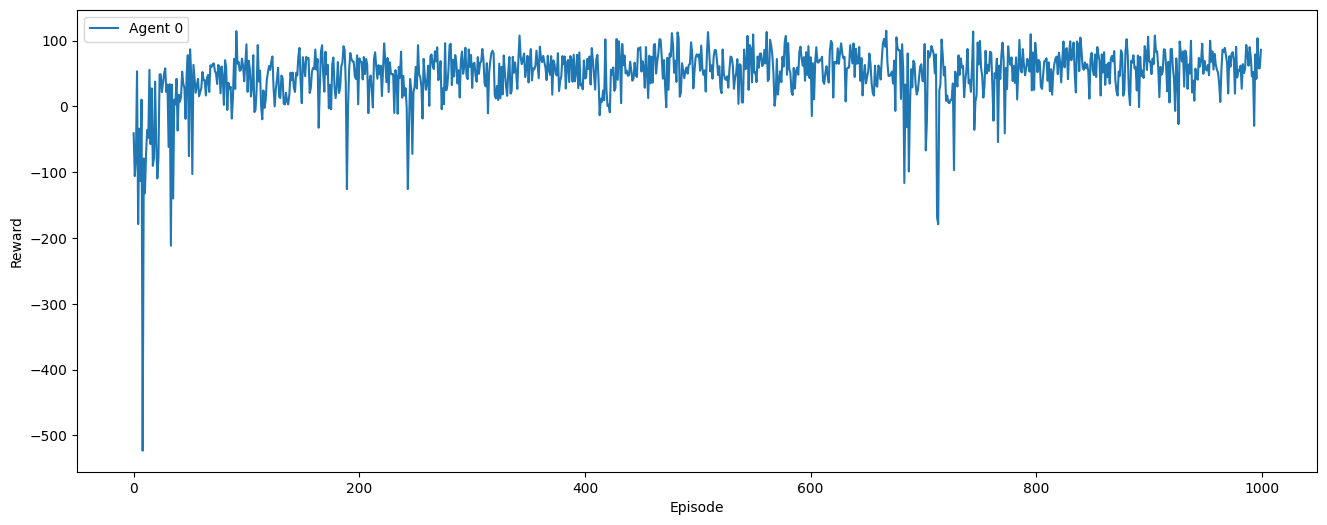

In [10]:
fig, ax = plt.subplots(figsize=(16, 6))
# for i in range(len(agent_ep_summed_rewards)):
agent = 0
ax.plot(agent_ep_summed_rewards[agent]['Episode'], agent_ep_summed_rewards[agent]['Reward'], label=f'Agent {agent}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


Centralized DQN

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

model_folder = 'cdqn400ep500m'
ep_summed_rewards_df = pd.read_csv(f'model_metric_data/{model_folder}/ep_summed_rewards.csv')

ep_latencies_df = pd.read_csv(f'model_metric_data/{model_folder}/ep_latencies.csv')

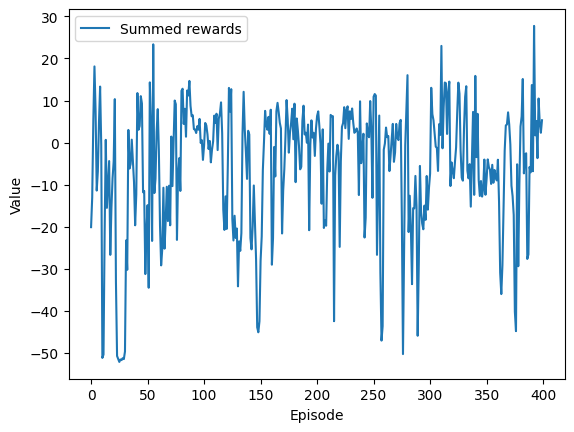

<module 'matplotlib.pyplot' from '/home/jprodanov/resource-elastisity-nancy/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [6]:
plt.plot(ep_summed_rewards_df['Reward'], label='Summed rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()
plt

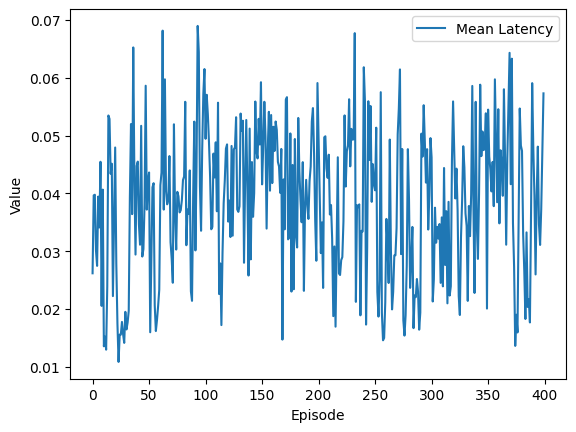

<module 'matplotlib.pyplot' from '/home/jprodanov/resource-elastisity-nancy/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [7]:
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Latency')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()
plt